# Simulation
## Assignment 3.1 – Common random numbers
#### Ari Viitala 432568

In [200]:
import numpy as np
import time 
import matplotlib.pyplot as plt

In [77]:
def system(lambda_c, mu_1, mu_2, seed_c, seed_s1, seed_s2, seed_s):
    rand_customers = np.random
    rand_server1 = np.random
    rand_server2 = np.random 
    rand_switch = np.random
    
    rand_customers.seed(seed_c)
    rand_server1.seed(seed_s1)
    rand_server2.seed(seed_s2)
    rand_switch.seed(seed_s)
    
    t = 0
    n_out = 0
    customer = rand_customers.exponential(lambda_c)
    server1 = 10000000
    server2 = 10000000
    status1 = 0
    status2 = 0
    que1 = 0
    que2 = 0
    que_t = 0
    
    while n_out < 100:
        #print("Que1: " + str(que1))
        #print("Que2: " + str(que2))
        if customer < min(server1, server2):
            que_t += (customer - t) * (que1 + que2)
            t = customer
            
            if que1 < que2:
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            elif que2 < que1:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            elif rand_switch.random() < 0.5:
                if status1 == 0:
                    server1 = t + rand_server1.exponential(mu_1)
                    status1 = 1
                else:
                    que1 += 1
            else:
                if status2 == 0:
                    server2 = t + rand_server2.exponential(mu_2)
                    status2 = 1
                else:
                    que2 += 1
            customer = t + rand_customers.exponential(lambda_c)
        else:
            ready = min(server1, server2)
            que_t += (ready - t) * (que1 + que2)
            n_out += 1
            t = ready
            if server1 < server2:
                if que1 == 0:
                    status1 = 0
                    server1 = 100000000
                else:
                    que1 -= 1
                    server1 = t + np.random.exponential(mu_1)
            elif que2 == 0:
                status2 = 0
                server2 = 100000000
            else:
                que2 -= 1
                server2 = t + np.random.exponential(mu_2)
    return que_t

In [250]:
times1 = []
times2 = []
CRN_times1 = []
CRN_times2 = []
seeder = np.random
seeder.seed(int(time.time()))
for i in range(0,1000):
    seed = int(time.time() / (i + 10))
    times1.append(round(system(1, 0.6, 0.6, seeder.randint(1,100), seeder.randint(1,100), seeder.randint(1,100), seeder.randint(1,100)), 2))
    times2.append(round(system(1, 0.3, 0.9, seeder.randint(1,100), seeder.randint(1,100), seeder.randint(1,100), seeder.randint(1,100)), 2))
    CRN_times1.append(round(system(1, 0.6, 0.6, seed,seed,seed,seed), 2))
    CRN_times2.append(round(system(1, 0.3, 0.9, seed,seed,seed,seed), 2))    



In [251]:
diff = np.array(times1) - np.array(times2)
CRN_diff = np.array(CRN_times1) - np.array(CRN_times2)
print("Independent mean: " + str(np.mean(diff)))
print("Independent deviation: " + str(np.std(diff)))
print("CRN mean: " + str(np.mean(CRN_diff)))
print("CRN deviation: " + str(np.std(CRN_diff)))


Independent mean: 0.14377
Independent deviation: 7.95351622159
CRN mean: 0.48954
CRN deviation: 6.91342101918


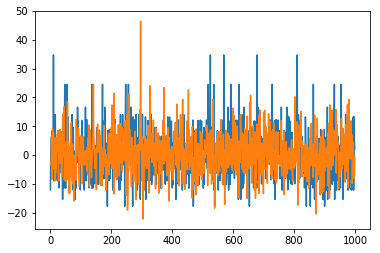

In [252]:
plt.plot(diff)
plt.plot(CRN_diff)